In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

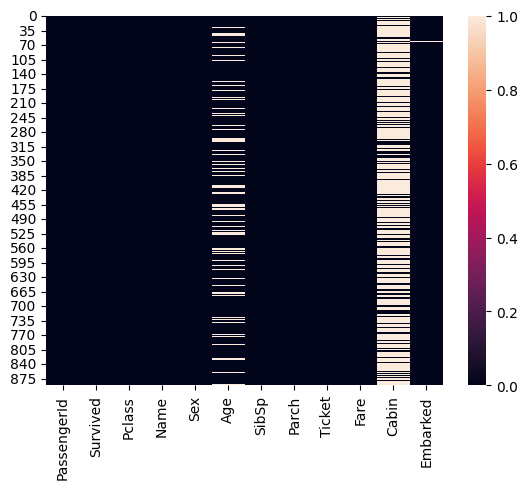

In [8]:
sns.heatmap(titanic.isnull())

<Axes: xlabel='Survived', ylabel='count'>

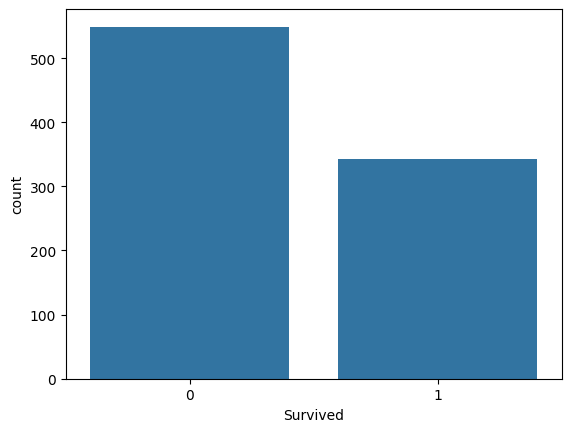

In [9]:
sns.countplot(x="Survived",data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

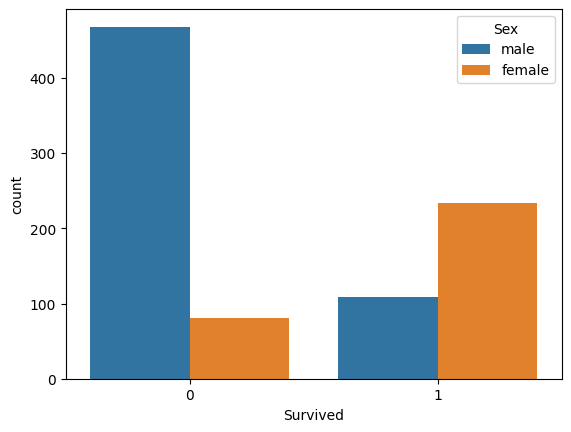

In [10]:
sns.countplot(x="Survived",data=titanic,hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

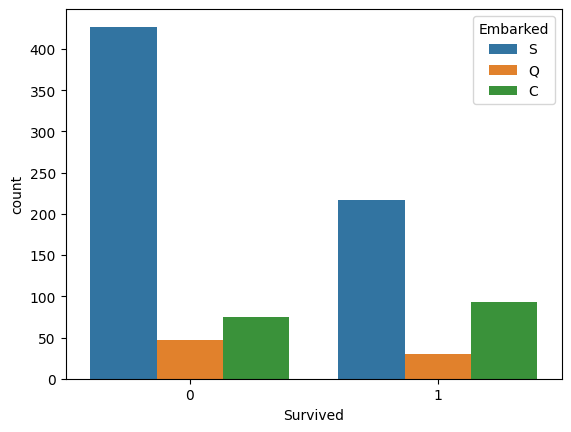

In [11]:
sns.countplot(x="Survived",data=titanic,hue="Embarked")

<Axes: xlabel='Survived', ylabel='count'>

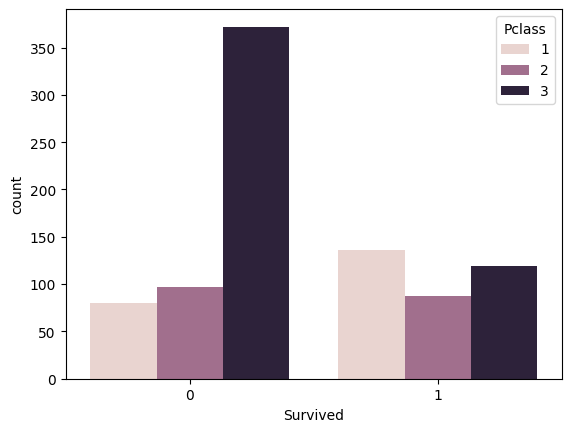

In [12]:
sns.countplot(x="Survived",data=titanic,hue="Pclass")

In [13]:
titanic.dropna(subset=['Embarked'],inplace=True)

<Axes: xlabel='Pclass', ylabel='Age'>

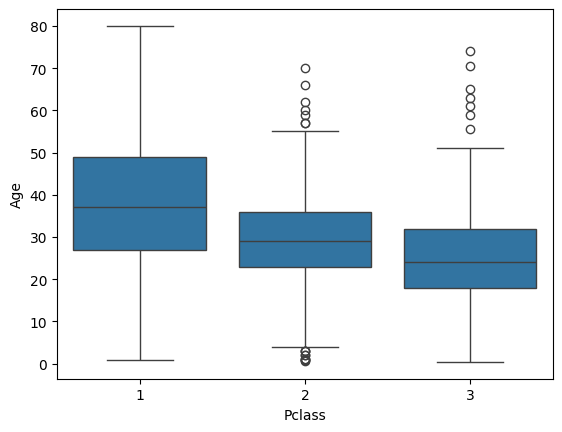

In [14]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [15]:
##titanic['Age'].fillna(titanic['Age'].median(),inplace=True)
def impute_age(cols):
    Age=cols[0]
    pclass=cols[1]
    if pd.isnull(Age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 28
        else:
            return 24
    else:
        return Age
    
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\RONIT\AppData\Local\Temp\ipykernel_18632\256662142.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\RONIT\AppData\Local\Temp\ipykernel_18632\256662142.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=cols[1]


In [16]:
titanic.drop(columns=['Cabin'],inplace=True)

In [17]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Axes: >

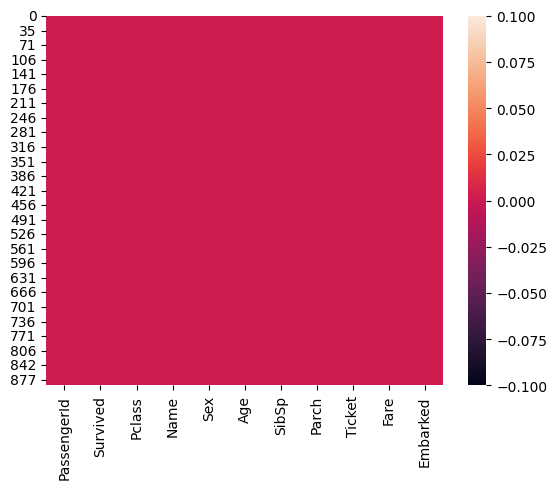

In [18]:
sns.heatmap(titanic.isnull())

In [19]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
female=(titanic.Sex=='female').sum()
print("Number of female:",female)
male=(titanic.Sex=='male').sum()
print("Numner of male:",male)
total_survived=(titanic.Survived==1).sum()
print("Total people survived:",total_survived)
total_died=(titanic.Survived==0).sum()
print("Total people died:",total_died)
female_survived = ((titanic.Sex=='female')&(titanic.Survived==1)).sum()
print("Total number of female survived:",female_survived)
female_death = ((titanic.Sex=='female')&(titanic.Survived==0)).sum()
print("Total number of female died:",female_death)
male_survived = ((titanic.Sex=='male')&(titanic.Survived==1)).sum()
print("Total number of male survived:",male_survived)
male_death = ((titanic.Sex=='male')&(titanic.Survived==1)).sum()
print("Total number of male died:",male_death)

Number of female: 312
Numner of male: 577
Total people survived: 340
Total people died: 549
Total number of female survived: 231
Total number of female died: 81
Total number of male survived: 109
Total number of male died: 109


In [21]:
max_fare=titanic['Fare'].max()
print("Maximum fare was:",max_fare)
min_fare=titanic['Fare'].min()
print("Minimum fare was:",min_fare)

Maximum fare was: 512.3292
Minimum fare was: 0.0


In [22]:
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


<Axes: xlabel='Pclass', ylabel='Survived'>

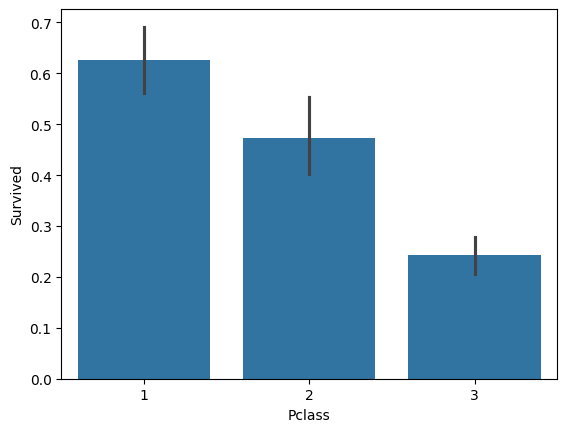

In [23]:
sns.barplot(x='Pclass',y='Survived',data=titanic)

In [24]:
pd.crosstab(titanic['Pclass'],titanic['Fare'])

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Pclass,,,,,,,,,,,,,,,,,,,,,
1,5,0,1,0,0,0,0,0,0,0,...,3,2,3,1,1,4,2,2,4,3
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,1,1,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Pclass', ylabel='Fare'>

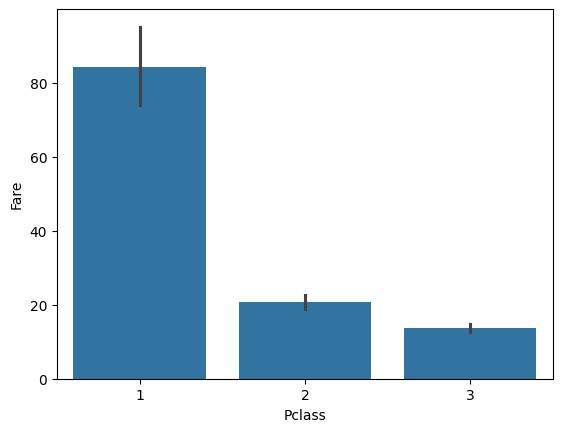

In [25]:
sns.barplot(x='Pclass',y='Fare',data=titanic)

In [26]:
Age_survived=pd.crosstab(titanic['Age'],titanic['Survived'])
Age_survived

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


<Axes: xlabel='Age', ylabel='Survived'>

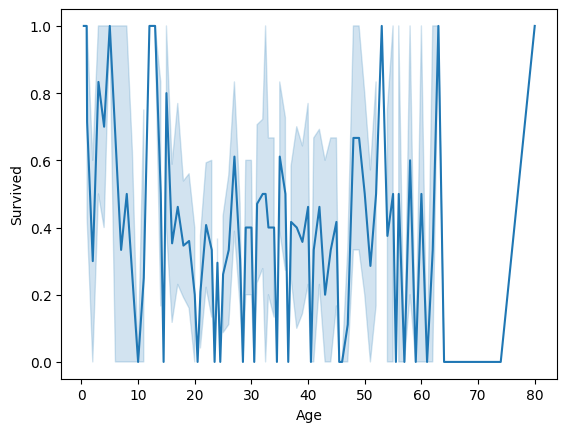

In [27]:
sns.lineplot(x='Age',y='Survived',data=titanic)

In [28]:
s=(titanic.Embarked=='S').sum()
print("People borded form southemton:",s)
c=(titanic.Embarked=='C').sum()
print("People borded form Cherbourg:",c)
q=(titanic.Embarked=='Q').sum()
print("People borded form Queenstown:",q)

People borded form southemton: 644
People borded form Cherbourg: 168
People borded form Queenstown: 77


<Axes: xlabel='Embarked', ylabel='Survived'>

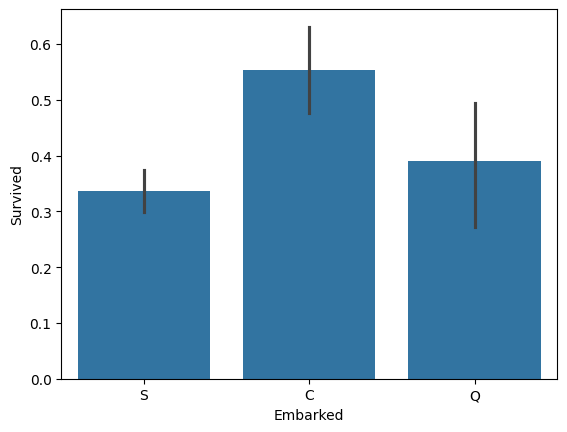

In [29]:
sns.barplot(x='Embarked',y='Survived',data=titanic)

<Axes: xlabel='SibSp', ylabel='count'>

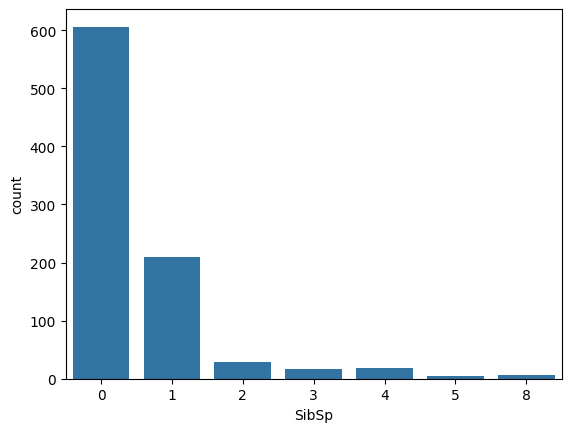

In [30]:
sns.countplot(x='SibSp',data=titanic)

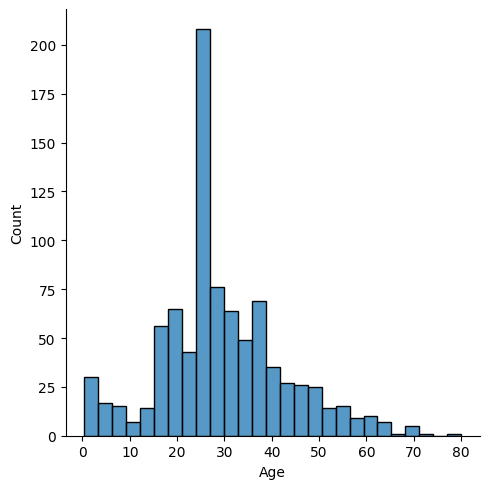

In [31]:
sns.displot(titanic['Age'])

In [32]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)


In [33]:
titanic.drop(['Age','Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [35]:
titanic=pd.concat([titanic,sex,embark],axis=1)
titanic

,Survived,Pclass,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,1,0,7.2500,True,False,True,True,False,True
1,1,1,1,0,71.2833,False,False,False,False,False,False
2,1,3,0,0,7.9250,False,False,True,False,False,True
3,1,1,1,0,53.1000,False,False,True,False,False,True
4,0,3,0,0,8.0500,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,True,False,True,True,False,True
887,1,1,0,0,30.0000,False,False,True,False,False,True
888,0,3,1,2,23.4500,False,False,True,False,False,True
889,1,1,0,0,30.0000,True,False,False,True,False,False


In [36]:
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [37]:
x

,Pclass,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,3,1,0,7.2500,True,False,True,True,False,True
1,1,1,0,71.2833,False,False,False,False,False,False
2,3,0,0,7.9250,False,False,True,False,False,True
3,1,1,0,53.1000,False,False,True,False,False,True
4,3,0,0,8.0500,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,True,False,True,True,False,True
887,1,0,0,30.0000,False,False,True,False,False,True
888,3,1,2,23.4500,False,False,True,False,False,True
889,1,0,0,30.0000,True,False,False,True,False,False


In [38]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [41]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr=LogisticRegression()

In [50]:
lr.fit(x_train,y_train)

C:\Users\RONIT\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [51]:
prediction=lr.predict(x_test)
prediction

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0])

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       170
           1       0.66      0.71      0.69        97

    accuracy                           0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.77      0.76      0.77       267



In [54]:
cm=confusion_matrix(y_test,prediction)
cm

array([[135,  35],
       [ 28,  69]])

<Axes: >

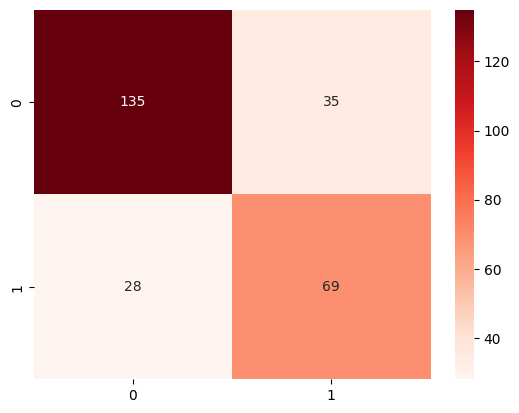

In [55]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")